# Author: Himanshu Hemant Paithane

# Notebook 8: Neural Network for Smoking Prediction

In this notebook, we'll implement and evaluate Neural Network models for predicting smoking status based on health indicators. We'll use the cleaned datasets prepared in Notebook 1.

## Understanding Neural Networks

Neural Networks are a set of algorithms designed to recognize patterns. They are inspired by the structure and function of the human brain and are particularly good at finding complex, non-linear relationships in data.

### How Neural Networks Work:
1. They consist of layers of interconnected nodes (neurons), including an input layer, one or more hidden layers, and an output layer
2. Each connection between neurons has a weight, which is adjusted during training
3. Each neuron applies an activation function to the weighted sum of its inputs
4. During training, the network adjusts weights using backpropagation to minimize prediction errors
5. For classification, the output layer provides probability estimates for each class

### Advantages of Neural Networks:
- Can model complex, non-linear relationships
- Capable of automatic feature learning
- Highly flexible and adaptable to different types of data
- Often perform well on large datasets
- Can handle high-dimensional data

### Limitations of Neural Networks:
- Less interpretable than simpler models ("black box" nature)
- Require careful tuning of hyperparameters
- Computationally intensive to train
- Prone to overfitting, especially with small datasets
- Sensitive to feature scaling

In this notebook, we'll use the MLPClassifier (Multi-layer Perceptron) from scikit-learn, which is a simple neural network implementation suitable for our classification task.

## 1. Import Libraries and Load Data

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For Neural Network model
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # Scaling is critical for Neural Networks
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Set random seed for reproducibility
RANDOM_STATE = 42

# Set up visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
# Load the full and reduced datasets
df_full = pd.read_csv('smoking_cleaned_full.csv')
df_reduced = pd.read_csv('smoking_cleaned_reduced.csv')

# Display basic information about the datasets
print(f"Full dataset shape: {df_full.shape}")
print(f"Reduced dataset shape: {df_reduced.shape}")

# Verify that both datasets have the target variable
print(f"\nTarget variable 'smoking' distribution in full dataset:\n{df_full['smoking'].value_counts()}")
print(f"\nTarget variable 'smoking' distribution in reduced dataset:\n{df_reduced['smoking'].value_counts()}")

Full dataset shape: (44084, 30)
Reduced dataset shape: (44084, 16)

Target variable 'smoking' distribution in full dataset:
smoking
0    27972
1    16112
Name: count, dtype: int64

Target variable 'smoking' distribution in reduced dataset:
smoking
0    27972
1    16112
Name: count, dtype: int64


## 2. Data Preparation for Neural Networks

Neural Networks are highly sensitive to feature scaling. Features with large values can dominate the network's learning process, leading to poor performance. It's essential to scale all features to a similar range.

We'll use StandardScaler to standardize our features (mean=0, variance=1), which is generally preferred for neural networks.

In [3]:
# Separate features and target for both datasets
X_full = df_full.drop('smoking', axis=1)
y_full = df_full['smoking']

X_reduced = df_reduced.drop('smoking', axis=1)
y_reduced = df_reduced['smoking']

# Split the data into training and testing sets
X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(
    X_full, y_full, test_size=0.2, random_state=RANDOM_STATE, stratify=y_full
)

X_reduced_train, X_reduced_test, y_reduced_train, y_reduced_test = train_test_split(
    X_reduced, y_reduced, test_size=0.2, random_state=RANDOM_STATE, stratify=y_reduced
)

# Apply feature scaling (StandardScaler for Neural Networks)
scaler_full = StandardScaler()
X_full_train_scaled = scaler_full.fit_transform(X_full_train)
X_full_test_scaled = scaler_full.transform(X_full_test)

scaler_reduced = StandardScaler()
X_reduced_train_scaled = scaler_reduced.fit_transform(X_reduced_train)
X_reduced_test_scaled = scaler_reduced.transform(X_reduced_test)

print("Data preparation for Neural Network completed successfully.")
print(f"Training set size: {X_full_train.shape[0]} samples")
print(f"Testing set size: {X_full_test.shape[0]} samples")
print(f"Full feature set: {X_full.shape[1]} features")
print(f"Reduced feature set: {X_reduced.shape[1]} features")

Data preparation for Neural Network completed successfully.
Training set size: 35267 samples
Testing set size: 8817 samples
Full feature set: 29 features
Reduced feature set: 15 features


## 3. Building and Training Neural Network Models

We'll create a simple Multi-Layer Perceptron (MLP) neural network with one hidden layer. We'll use the same network architecture for both the full and reduced feature sets.

In [4]:
# Function to evaluate model performance
def evaluate_model(y_true, y_pred, y_prob=None):
    """Calculate and return performance metrics for a classification model."""
    # Basic metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    # ROC AUC (if probability predictions are available)
    roc_auc = roc_auc_score(y_true, y_prob) if y_prob is not None else None
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc
    }

# Create and train Neural Network with full feature set
print("Training Neural Network model with full feature set...")
# Use a simple architecture: one hidden layer with 100 neurons
nn_full = MLPClassifier(
    hidden_layer_sizes=(100,),  # One hidden layer with 100 neurons
    activation='relu',          # ReLU activation function
    solver='adam',              # Adam optimizer
    alpha=0.0001,               # L2 regularization term
    batch_size='auto',          # Automatic batch size
    learning_rate='constant',   # Constant learning rate
    learning_rate_init=0.001,   # Initial learning rate
    max_iter=300,               # Maximum number of iterations
    random_state=RANDOM_STATE
)
nn_full.fit(X_full_train_scaled, y_full_train)

# Create and train Neural Network with reduced feature set
print("Training Neural Network model with reduced feature set...")
nn_reduced = MLPClassifier(
    hidden_layer_sizes=(100,),  
    activation='relu',          
    solver='adam',              
    alpha=0.0001,               
    batch_size='auto',          
    learning_rate='constant',   
    learning_rate_init=0.001,   
    max_iter=300,               
    random_state=RANDOM_STATE
)
nn_reduced.fit(X_reduced_train_scaled, y_reduced_train)

# Make predictions
y_full_pred = nn_full.predict(X_full_test_scaled)
y_reduced_pred = nn_reduced.predict(X_reduced_test_scaled)

# Get probability predictions
y_full_prob = nn_full.predict_proba(X_full_test_scaled)[:, 1]
y_reduced_prob = nn_reduced.predict_proba(X_reduced_test_scaled)[:, 1]

# Evaluate performance
full_metrics = evaluate_model(y_full_test, y_full_pred, y_full_prob)
reduced_metrics = evaluate_model(y_reduced_test, y_reduced_pred, y_reduced_prob)

# Display results
print("\nNeural Network Model with Full Feature Set:")
print(f"Accuracy: {full_metrics['accuracy']:.4f}")
print(f"Precision: {full_metrics['precision']:.4f}")
print(f"Recall: {full_metrics['recall']:.4f}")
print(f"F1 Score: {full_metrics['f1_score']:.4f}")
print(f"ROC AUC: {full_metrics['roc_auc']:.4f}")

print("\nNeural Network Model with Reduced Feature Set:")
print(f"Accuracy: {reduced_metrics['accuracy']:.4f}")
print(f"Precision: {reduced_metrics['precision']:.4f}")
print(f"Recall: {reduced_metrics['recall']:.4f}")
print(f"F1 Score: {reduced_metrics['f1_score']:.4f}")
print(f"ROC AUC: {reduced_metrics['roc_auc']:.4f}")

Training Neural Network model with full feature set...
Training Neural Network model with reduced feature set...

Neural Network Model with Full Feature Set:
Accuracy: 0.7501
Precision: 0.6573
Recall: 0.6608
F1 Score: 0.6590
ROC AUC: 0.8324

Neural Network Model with Reduced Feature Set:
Accuracy: 0.7523
Precision: 0.6621
Recall: 0.6580
F1 Score: 0.6600
ROC AUC: 0.8340


## 4. Understanding the Evaluation Metrics

Let's understand what each metric means in the context of our smoking prediction problem:

1. **Accuracy**: The proportion of correct predictions (both smokers and non-smokers correctly identified) out of all predictions. While intuitive, accuracy can be misleading in imbalanced datasets like ours (63% non-smokers vs. 37% smokers).

2. **Precision**: The proportion of true positive predictions (correctly identified smokers) among all positive predictions. In our context: "When the Neural Network model predicts someone is a smoker, how often is it right?" High precision means fewer false positives (non-smokers incorrectly classified as smokers).

3. **Recall (Sensitivity)**: The proportion of true positive predictions (correctly identified smokers) among all actual smokers. In our context: "Of all actual smokers, how many did the Neural Network model correctly identify?" High recall means fewer false negatives (smokers incorrectly classified as non-smokers).

4. **F1 Score**: The harmonic mean of precision and recall, providing a single metric that balances both concerns. This is particularly useful in our case with moderate class imbalance, as it gives equal importance to both precision and recall.

5. **ROC AUC**: Area Under the Receiver Operating Characteristic curve, which measures the model's ability to distinguish between smokers and non-smokers across all possible classification thresholds. Values range from 0.5 (no discriminative power, equivalent to random guessing) to 1.0 (perfect discrimination).

The choice of which metric to prioritize depends on the specific application:
- For applications where false positives are costly (e.g., unnecessary medical interventions), precision should be prioritized.
- For public health screening where missing smokers is more concerning, recall would be more important.
- In balanced scenarios, F1 score and ROC AUC provide good overall assessments of model performance.

## 5. Examining Neural Network Convergence

One important aspect of neural networks is their training convergence. Let's look at the loss curves to understand how our models learned over time:

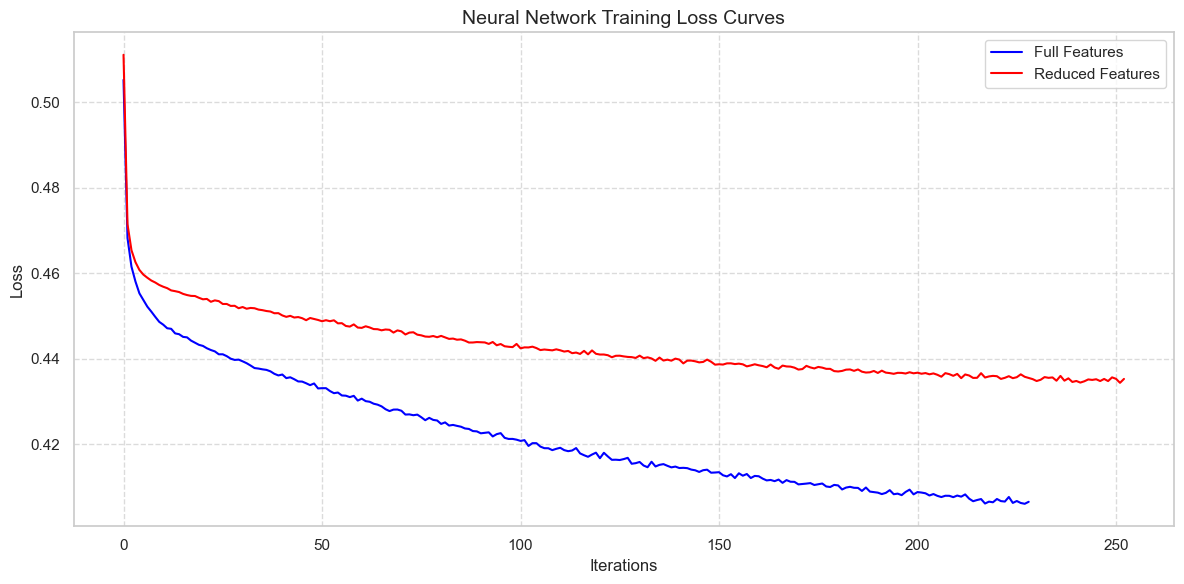

In [5]:
# Plot loss curves for both models
plt.figure(figsize=(12, 6))

# Plot loss curve for full feature model
plt.plot(nn_full.loss_curve_, label='Full Features', color='blue')

# Plot loss curve for reduced feature model
plt.plot(nn_reduced.loss_curve_, label='Reduced Features', color='red')

plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Neural Network Training Loss Curves', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 6. Visualizing Model Performance

Confusion Matrix for Full Feature Set:


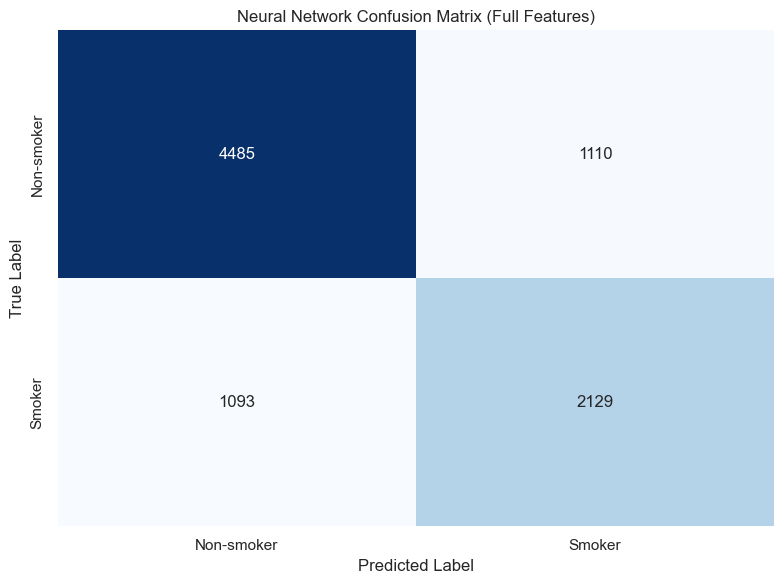

Specificity (True Negative Rate): 0.8016
Negative Predictive Value: 0.8041

Confusion Matrix for Reduced Feature Set:


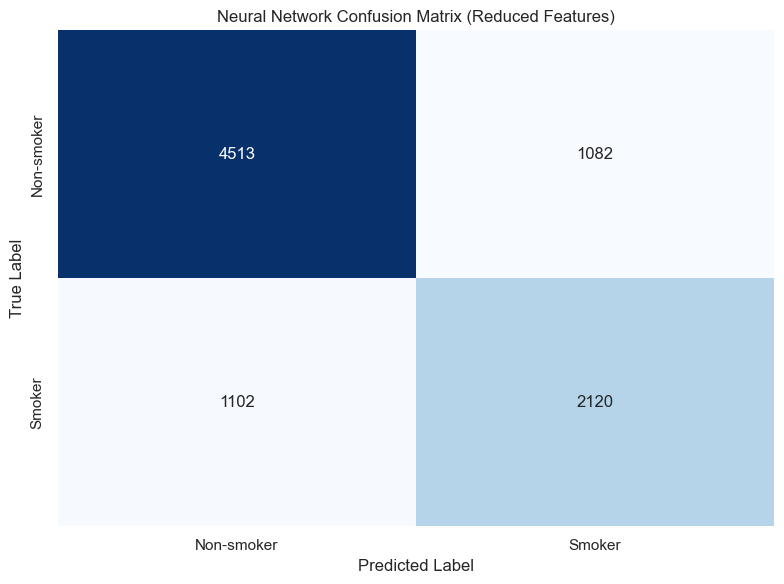

Specificity (True Negative Rate): 0.8066
Negative Predictive Value: 0.8037


In [6]:
# Function to plot confusion matrices
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
               xticklabels=['Non-smoker', 'Smoker'],
               yticklabels=['Non-smoker', 'Smoker'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.tight_layout()
    plt.show()
    
    # Calculate and display derived metrics
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)  # True negative rate
    npv = tn / (tn + fn)  # Negative predictive value
    print(f"Specificity (True Negative Rate): {specificity:.4f}")
    print(f"Negative Predictive Value: {npv:.4f}")

# Function to plot ROC curves
def plot_roc_curve(y_true, y_prob, label):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

# Display confusion matrices
print("Confusion Matrix for Full Feature Set:")
plot_confusion_matrix(y_full_test, y_full_pred, 'Neural Network Confusion Matrix (Full Features)')

print("\nConfusion Matrix for Reduced Feature Set:")
plot_confusion_matrix(y_reduced_test, y_reduced_pred, 'Neural Network Confusion Matrix (Reduced Features)')

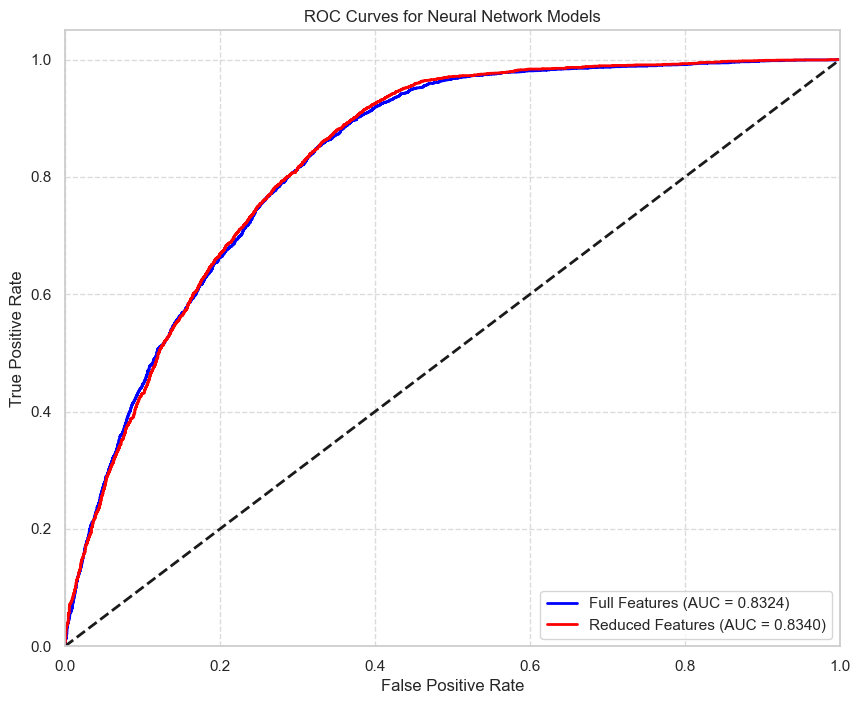

In [7]:
# Plot ROC curves
plt.figure(figsize=(10, 8))

# Plot ROC curve for the full feature model
fpr_full, tpr_full, roc_auc_full = plot_roc_curve(y_full_test, y_full_prob, 'Full')
plt.plot(fpr_full, tpr_full, label=f'Full Features (AUC = {roc_auc_full:.4f})', lw=2, color='blue')

# Plot ROC curve for the reduced feature model
fpr_reduced, tpr_reduced, roc_auc_reduced = plot_roc_curve(y_reduced_test, y_reduced_prob, 'Reduced')
plt.plot(fpr_reduced, tpr_reduced, label=f'Reduced Features (AUC = {roc_auc_reduced:.4f})', lw=2, color='red')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Neural Network Models')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## 7. Comparison of Feature Sets

Let's directly compare the performance of our full and reduced feature sets to see how much predictive power we retain with fewer features:

In [8]:
# Create a comparison DataFrame
metrics_comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Full Features': [
        full_metrics['accuracy'],
        full_metrics['precision'],
        full_metrics['recall'],
        full_metrics['f1_score'],
        full_metrics['roc_auc']
    ],
    'Reduced Features': [
        reduced_metrics['accuracy'],
        reduced_metrics['precision'],
        reduced_metrics['recall'],
        reduced_metrics['f1_score'],
        reduced_metrics['roc_auc']
    ]
})

# Calculate differences and percentage changes
metrics_comparison['Absolute Difference'] = metrics_comparison['Full Features'] - metrics_comparison['Reduced Features']
metrics_comparison['Percentage Change (%)'] = (metrics_comparison['Absolute Difference'] / metrics_comparison['Full Features']) * 100

# Display the comparison
print("Comparison of Neural Network Performance: Full vs. Reduced Feature Sets")
metrics_comparison.set_index('Metric')

Comparison of Neural Network Performance: Full vs. Reduced Feature Sets


,Full Features,Reduced Features,Absolute Difference,Percentage Change (%)
Metric,,,,
Accuracy,0.750142,0.752297,-0.002155,-0.287269
Precision,0.657302,0.662086,-0.004785,-0.727909
Recall,0.660770,0.657976,0.002793,0.422734
F1 Score,0.659031,0.660025,-0.000994,-0.150797
ROC AUC,0.832436,0.834011,-0.001575,-0.189239


<Figure size 1200x800 with 0 Axes>

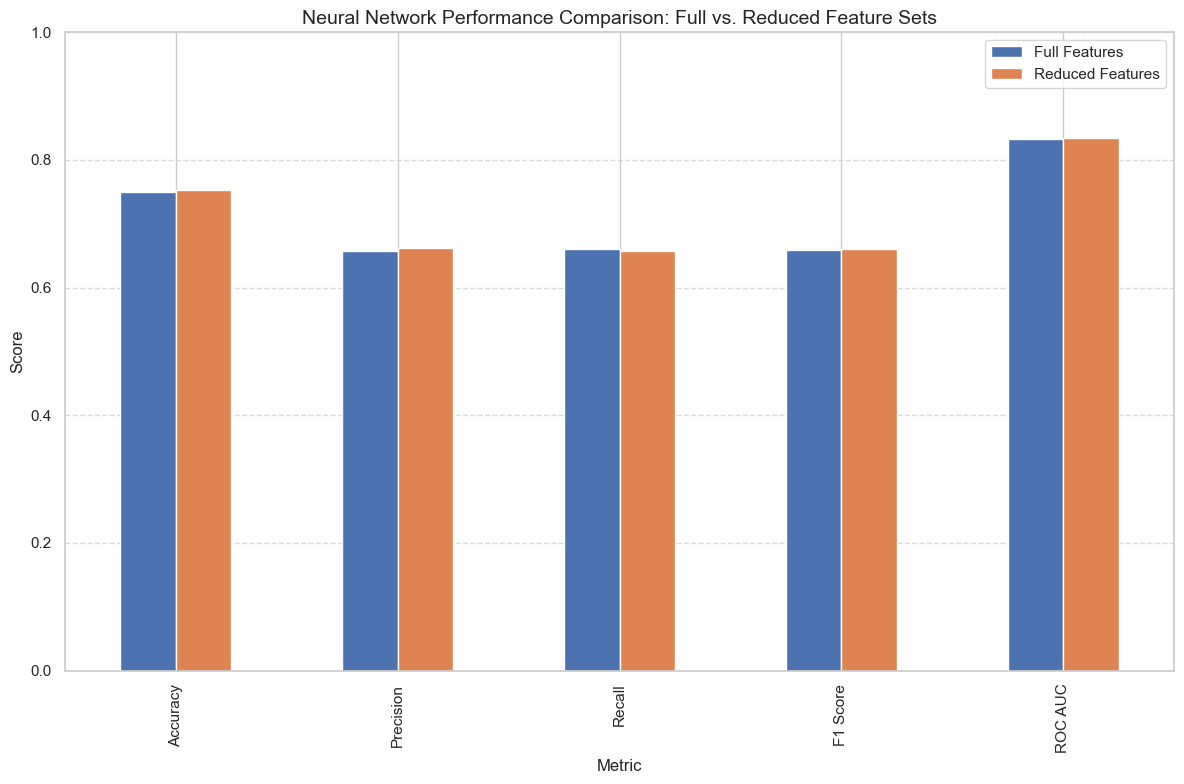

In [9]:
# Visualize the comparison
plt.figure(figsize=(12, 8))
metrics_comparison.set_index('Metric').loc[:, ['Full Features', 'Reduced Features']].plot(kind='bar')
plt.title('Neural Network Performance Comparison: Full vs. Reduced Feature Sets', fontsize=14)
plt.ylabel('Score', fontsize=12)
plt.ylim([0, 1])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

## 8. Save Results for Comparison with Other Models

Let's save our Neural Network model performance metrics to CSV files for later comparison with other models:

In [10]:
# Create DataFrames for saving results
nn_full_results = pd.DataFrame({
    'Model': ['Neural Network'],
    'Feature_Set': ['Full'],
    'Accuracy': [full_metrics['accuracy']],
    'Precision': [full_metrics['precision']],
    'Recall': [full_metrics['recall']],
    'F1_Score': [full_metrics['f1_score']],
    'ROC_AUC': [full_metrics['roc_auc']]
})

nn_reduced_results = pd.DataFrame({
    'Model': ['Neural Network'],
    'Feature_Set': ['Reduced'],
    'Accuracy': [reduced_metrics['accuracy']],
    'Precision': [reduced_metrics['precision']],
    'Recall': [reduced_metrics['recall']],
    'F1_Score': [reduced_metrics['f1_score']],
    'ROC_AUC': [reduced_metrics['roc_auc']]
})

# Combine results
nn_results = pd.concat([nn_full_results, nn_reduced_results], ignore_index=True)

# Add hyperparameter information
nn_results['Hyperparameters'] = ["hidden_layer_sizes=(100,), activation='relu'", "hidden_layer_sizes=(100,), activation='relu'"]

# Save results to CSV
nn_results.to_csv('neural_network_model_results.csv', index=False)
print("Saved Neural Network model results to neural_network_model_results.csv")

# Display the final results table
nn_results

Saved Neural Network model results to neural_network_model_results.csv


,Model,Feature_Set,Accuracy,Precision,Recall,F1_Score,ROC_AUC,Hyperparameters
0,Neural Network,Full,0.750142,0.657302,0.660770,0.659031,0.832436,"hidden_layer_sizes=(100,), activation='relu'"
1,Neural Network,Reduced,0.752297,0.662086,0.657976,0.660025,0.834011,"hidden_layer_sizes=(100,), activation='relu'"
